<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_09_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM(Long Short-Term Memory), GRU(Gated Recurrent Unit)
>* LSTM 동작 원리 및 효과
>* GRU, LSTM의 간소화 버전
>* Dropout으로 overfitting 줄이기
>* 하나의 층을 더 사용함으로써 hidden state를 모두 출력해줘야 한다.
>* 각 모델의 모델 파라미터 개수

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

17473536/17464789 [==============================] - 1s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-rnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 40ms/step - loss: 0.6921 - accuracy: 0.5527 - val_loss: 0.6910 - val_accuracy: 0.5856
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6877 - accuracy: 0.6299 - val_loss: 0.6842 - val_accuracy: 0.6324
Epoch 3/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6635 - accuracy: 0.6136 - val_loss: 0.6340 - val_accuracy: 0.7006
Epoch 4/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6039 - accuracy: 0.7344 - val_loss: 0.5943 - val_accuracy: 0.7368
Epoch 5/100
313/313 [==============================] - 20s 65ms/step - loss: 0.5757 - accuracy: 0.7491 - val_loss: 0.5749 - val_accuracy: 0.7378
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5579 - accuracy: 0.7591 - val_loss: 0.5574 - val_accuracy: 0.7536
Epoch 7/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5415 - accuracy: 0.7686 - val_loss: 0.5471 - val_ac

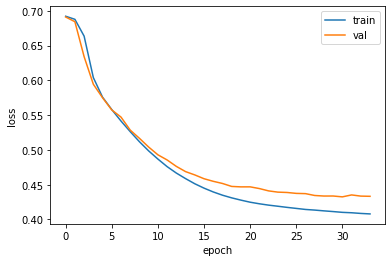

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
# LSTM에 Dropout 적용하여 overfitting 줄이기

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-rnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6919 - accuracy: 0.5630 - val_loss: 0.6908 - val_accuracy: 0.6104
Epoch 2/100
313/313 [==============================] - 17s 56ms/step - loss: 0.6888 - accuracy: 0.6166 - val_loss: 0.6863 - val_accuracy: 0.6482
Epoch 3/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6813 - accuracy: 0.6532 - val_loss: 0.6743 - val_accuracy: 0.6820
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6562 - accuracy: 0.6891 - val_loss: 0.6260 - val_accuracy: 0.7184
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5975 - accuracy: 0.7214 - val_loss: 0.5788 - val_accuracy: 0.7312
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5705 - accuracy: 0.7322 - val_loss: 0.5604 - val_accuracy: 0.7476
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5514 - accuracy: 0.7478 - val_loss: 0.5437 - val_ac

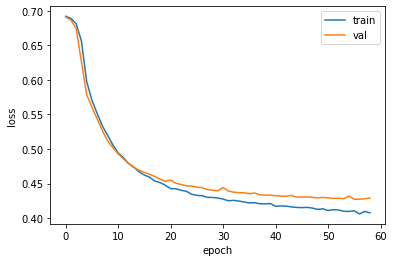

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
# 2개의 층 연결하기

"""
기존 RNN은 출력할 때 마지막 time step의 hidden state만 출력하기 때문에
return_sequences 파라미터를 통해 모든 hidden state를 출력하게 해줘야 한다.
"""

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 29s 80ms/step - loss: 0.6929 - accuracy: 0.5272 - val_loss: 0.6927 - val_accuracy: 0.4904
Epoch 2/100
313/313 [==============================] - 24s 78ms/step - loss: 0.6913 - accuracy: 0.5228 - val_loss: 0.6900 - val_accuracy: 0.5674
Epoch 3/100
313/313 [==============================] - 24s 78ms/step - loss: 0.6828 - accuracy: 0.5967 - val_loss: 0.6720 - val_accuracy: 0.5962
Epoch 4/100
313/313 [==============================] - 24s 78ms/step - loss: 0.6303 - accuracy: 0.6665 - val_loss: 0.5923 - val_accuracy: 0.7146
Epoch 5/100
313/313 [==============================] - 24s 78ms/step - loss: 0.5696 - accuracy: 0.7288 - val_loss: 0.5566 - val_accuracy: 0.7440
Epoch 6/100
313/313 [==============================] - 24s 77ms/step - loss: 0.5397 - accuracy: 0.7473 - val_loss: 0.5250 - val_accuracy: 0.7542
Epoch 7/100
313/313 [==============================] - 24s 78ms/step - loss: 0.5174 - accuracy: 0.7585 - val_loss: 0.5056 - val_ac

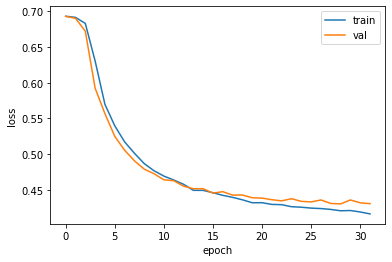

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
# GRU 신경망 훈련

model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [18]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 45ms/step - loss: 0.6926 - accuracy: 0.5264 - val_loss: 0.6917 - val_accuracy: 0.5486
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6909 - accuracy: 0.5630 - val_loss: 0.6899 - val_accuracy: 0.5684
Epoch 3/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6882 - accuracy: 0.5871 - val_loss: 0.6867 - val_accuracy: 0.6038
Epoch 4/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6839 - accuracy: 0.6074 - val_loss: 0.6816 - val_accuracy: 0.6138
Epoch 5/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6769 - accuracy: 0.6230 - val_loss: 0.6736 - val_accuracy: 0.6202
Epoch 6/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6656 - accuracy: 0.6431 - val_loss: 0.6598 - val_accuracy: 0.6410
Epoch 7/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6447 - accuracy: 0.6656 - val_loss: 0.6325 - val_ac

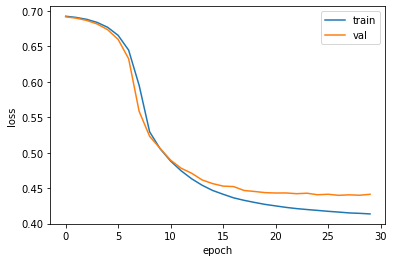

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 14ms/step - loss: 0.4277 - accuracy: 0.8015


[0.427741676568985, 0.8014799952507019]